# Image Feature Extraction


### First  is Reading Image Data In Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow


Skimage(Skicit- Image) is an open source library in Python used for image preprocessing.

Image Preprocessing is improving the image features and removing any deformities present in the image. It includes reading an image, resizing it, removing the noise, segmenting it and smoothing the sharp edges.


(300, 300, 3)


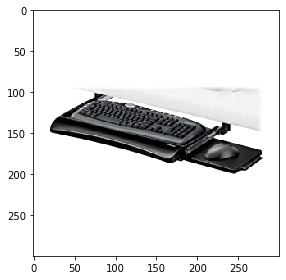

In [106]:
imagepath = "sample_data/amazon_images_subset/BT008UKTMW.jpg"
image = imread(imagepath)   # It loads the image from file
imshow(image)           # IT displays an image
print(image.shape)

(300, 300)


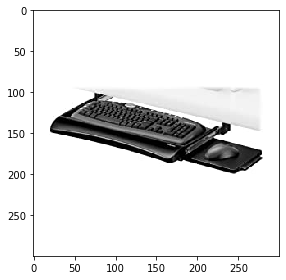

In [19]:
image_gray = imread(imagepath, as_gray = True)
imshow(image_gray)
print(image_gray.shape)

We can also convert an image and load it as an "Grayscale Image". These are the images which have range of shades of grey, the darkest shade being black and the Brightest shade being black.

To convert it into Grayscale image we set the parameter __as_gray__ in imread function as True.

But why to do it?
As you know the image is stored in the form of matrix and if you notice the difference between the shapes of image and image_gray, image has pixels 3 times more than image_gray. 

The normal picture has 3 dimensions because it stores the image in "RGB" form , that is in composition percentage of Red, Blue and Green color.

By using Grayscale images , you can reduce the dimensions of an image and hence reduce the computational complexity. If the dataset is too large, you can use Grayscale over colored.

Let's see one more example of an image with various colors.

(281, 300, 3)


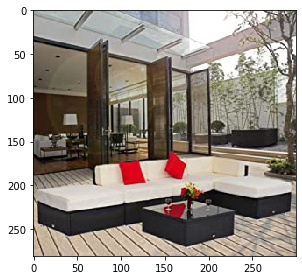

In [108]:
image1 = imread("sample_data/amazon_images_subset/B00LW2QH9I.jpg")
imshow(image1)
print(image1.shape)

(281, 300)


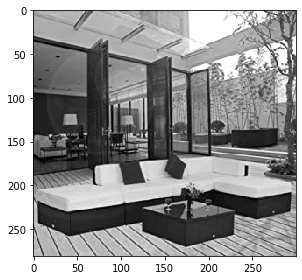

In [25]:
image1_gray = imread("sample_data/amazon_images_subset/B00LW2QH9I.jpg", as_gray = True)
imshow(image1_gray)
print(image1_gray.shape)

Now, you can see the difference more clearly in the colours of two pictures.

Above, I loaded the image two times to get two formats of images. Instead, we can change format of the image by __skimage.color__ module. This module contains all types of formats of the image and functions to convert one format to another.
Example;

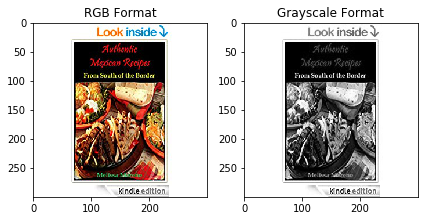

In [67]:
import skimage.color
image2 = imread("sample_data/amazon_images_subset/B00LY8ITFK.jpg")
image2_gray = skimage.color.rgb2gray(image2)
plt.subplot(1,2,1)
imshow(image2)
plt.title('RGB Format') 
plt.subplot(1,2,2)
imshow(image2_gray)
plt.title('Grayscale Format') 
plt.show()

rgb2gray converts coloured picture to a grayscale picture.

Other two popular formats are HSV(hue, saturation, value) which is just another representation of RGB format.
- _Hue_ is the degree on the color wheel where 0 is for red, 120 is green, 240 is blue and again 360 is red.
- _Saturation_ represents the percentage of that color, where 0 is white and 100 is full color.
- _Value_ is the mixture of the colors with varying amounts of black or white paint.


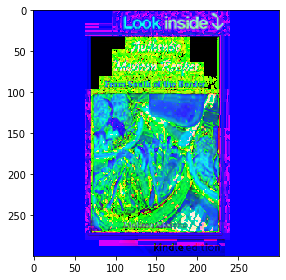

In [51]:
image2_hsv = skimage.color.rgb2hsv(image2)
imshow(image2_hsv)


### Resizing an Image

Our dataset may have images of different sizes, so we resize them into one same before using them for pre-trained model.

And for this we use __Skimage.transform__ module.

(200, 200, 3)


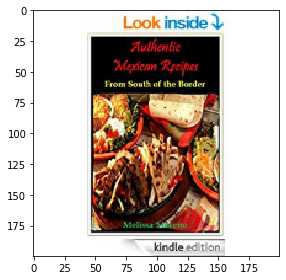

In [83]:
import skimage.transform
image2_resized = skimage.transform.resize(image2, (200, 200,3))
imshow(image2_resized)
print(image2_resized.shape)

### Rescaling an Image

Rescaling also means resizing an image by a particular factor. Upscale - increasing the size and downscale - reducing the size. Rescaling is used for images which have width and height different like in image1. The factor for downscale is less than 1 where as for upscale it is more than 1.

(239, 255, 3)


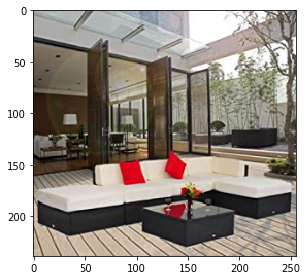

In [104]:
img_rescaled = skimage.transform.rescale(image1, scale = 0.85)
imshow(img_rescaled)
print(img_rescaled.shape)

So, there are many preprocessing methods available like cropping, rotating and etc.

Now coming upto creating a feature matrix of a coloured image. In coloured image we have 3 channels that are - Red , Green and Blue.
For example; the shape of image1 is (281, 300, 3) where 3 represents the channels. So originally number of features will be 281*300*3 with some value in each pixel. Instead of using the pixel values from the three channels separately, we can generate a new matrix that has the mean value of pixels from all three channels.

So how to do it? 

In [117]:
#First create a new matrix of same shape with all elements 0
feature_matrix = np.zeros((281,300))
for i in range(0, image1.shape[0]): #that is for the range of all rows
    for j in range(0,image1.shape[1]): #the range of all columns
        feature_matrix[i][j] = ((int(image1[i,j,0]) + int(image1[i,j,1]) + int(image1[i,j,2]))/3)
print(image1)
print(feature_matrix)

[[[172 178 174]
  [174 180 176]
  [177 183 179]
  ...
  [109 106 101]
  [107 104  99]
  [ 84  81  76]]

 [[157 163 159]
  [158 164 160]
  [160 166 162]
  ...
  [103 100  95]
  [114 111 106]
  [ 81  78  73]]

 [[163 169 165]
  [160 166 162]
  [156 162 158]
  ...
  [154 151 146]
  [115 112 107]
  [ 73  70  65]]

 ...

 [[202 184 164]
  [202 184 164]
  [201 183 163]
  ...
  [178 165 148]
  [153 140 124]
  [136 123 107]]

 [[204 186 166]
  [202 184 164]
  [198 180 160]
  ...
  [181 168 151]
  [171 158 142]
  [160 147 131]]

 [[201 183 163]
  [201 183 163]
  [200 182 162]
  ...
  [178 165 148]
  [167 154 138]
  [160 147 131]]]
[[174.66666667 176.66666667 179.66666667 ... 105.33333333 103.33333333
   80.33333333]
 [159.66666667 160.66666667 162.66666667 ...  99.33333333 110.33333333
   77.33333333]
 [165.66666667 162.66666667 158.66666667 ... 150.33333333 111.33333333
   69.33333333]
 ...
 [183.33333333 183.33333333 182.33333333 ... 163.66666667 139.
  122.        ]
 [185.33333333 183.333333

You can see the difference. Now we'll comvert the feature matrix into 1-D array of all features.

In [118]:
features = np.reshape(feature_matrix, (281*300))
print( features)
print(features.shape)

[174.66666667 176.66666667 179.66666667 ... 163.66666667 153.
 146.        ]
(84300,)


### Extract Edge Features

We extract Edge Features so as to recognise the shape of any object in the picture. An edge is identified by a sharp change in color.
So how is it done in a matrix?
we just check for the pixel value in the matrix which has a large difference from the values on the either side of it.

So we'll do Edge extraction by __Canny algorithm in Skimage.feature module__. Skimage.feature module has many inbuilt functions like finding blobs, edge filtering and many more.
 
__Canny Algorithm uses a series of steps, which involves other types of edge detection.__ Steps are:
- Gaussian Blur , which removes the noise from an image. It is represented by __sigma__ parameter.
- Sobel edge detection which is performed on both the x and y dimensions.It is used to highlight the edges in image. It is used to find the intensity gradients of the edges in the image. Intensity gradient means the steepness in the change of intensities near the edge. 
- Pixels far from any edge are removed.
- Then we use high and low threshold value to confirm the edges. If pixel's gradient value is more than high threshold value , it is considered to be a strong candidate for an edge pixel, if it is less than low threshold value it is rejected and if it is in between low and high threshold value it is considered as a weak candidate for an edge pixel.
- Now edges are detected finally. If the weak candidate is connected to strong candidate pixels then they are selected otherwise rejected.

In [127]:
import skimage.feature

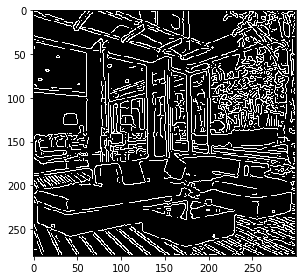

In [128]:
edges =  skimage.feature.canny(
    image=image1_gray,
    sigma=1.0,
    low_threshold=None,
    high_threshold=None,
)
imshow(edges)